In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/Titanic-Dataset.csv'

In [7]:
titanic_test=pd.read_csv(file_path)

In [8]:
print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
titanic_test_list= list(titanic_test.columns)
print(titanic_test_list)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [10]:
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
print(titanic_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
## Now we will handle the missing values
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)

In [14]:
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)

In [15]:
## Since Cabin no. is not useful we will drop it
titanic_test.drop(columns=['Cabin'], inplace=True)

In [19]:
print('Now dataset is cleaned\n', titanic_test.isnull().sum())

Now dataset is cleaned
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [20]:
# Sex and Embarked has categorical values so we will treat them by encoding with dummy variables
titanic_test= pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

In [21]:
# Since we dont need Name, Ticket and Passenger ID for prediction purpose we will drop them from our data set
titanic_test.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [23]:
print("Our Final Dataset is-")
titanic_test.head()

Our Final Dataset is-


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


No. of survived(1) and non-survived(0) people according to sex-


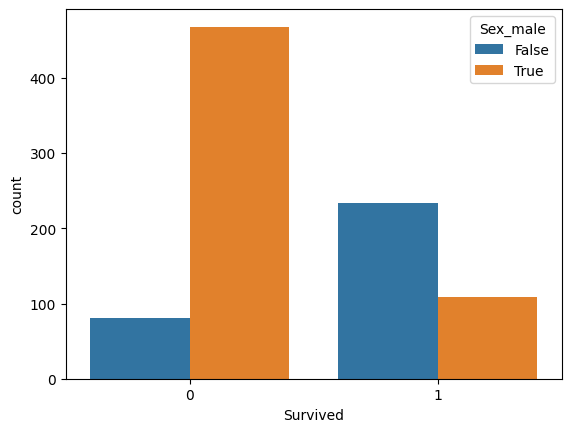

No. of survived(1) and non-survived(0) people according to class-


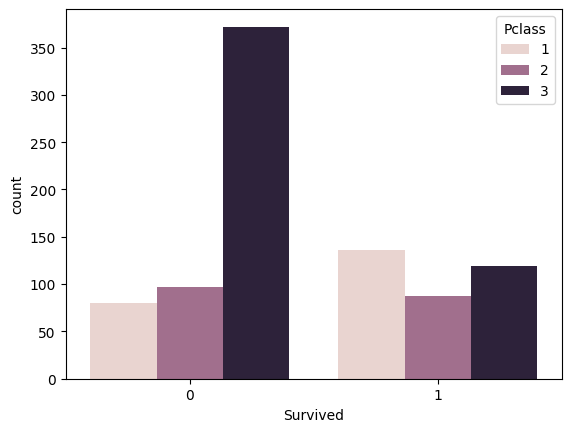

No. of survived(1) and non-survived(0) people according to age-


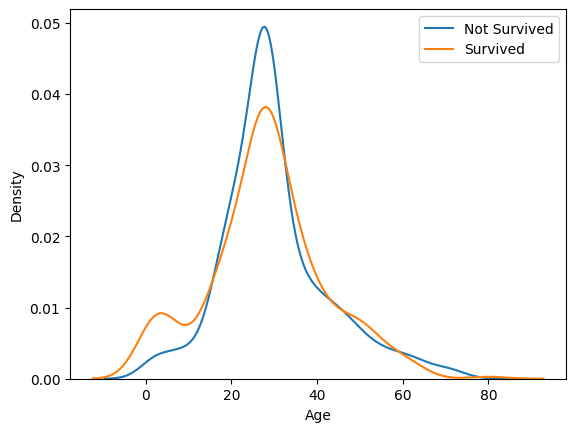

In [32]:
# Now we will visualise our survived and not survived person data set as-
print("No. of survived(1) and non-survived(0) people according to sex-")
sns.countplot(x='Survived', hue='Sex_male', data=titanic_test)
plt.show()
print("No. of survived(1) and non-survived(0) people according to class-")
sns.countplot(x='Survived', hue='Pclass', data=titanic_test)
plt.show()
print("No. of survived(1) and non-survived(0) people according to age-")
sns.kdeplot(titanic_test[titanic_test['Survived'] == 0]['Age'], label='Not Survived')
sns.kdeplot(titanic_test[titanic_test['Survived'] == 1]['Age'], label='Survived')
plt.legend()
plt.show()

In [38]:
features=list(set(titanic_test.columns)-set(['Survived']))

In [39]:
print(features)

['Age', 'SibSp', 'Fare', 'Sex_male', 'Pclass', 'Embarked_Q', 'Embarked_S', 'Parch']


In [40]:
target=(['Survived'])

In [41]:
print(target)

['Survived']


In [42]:
y=titanic_test[target].values

In [43]:
X=titanic_test[features].values

In [44]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
scaler=StandardScaler()

In [46]:
scaler.fit(train_X)

StandardScaler()

In [47]:
train_X=scaler.transform(train_X)

In [48]:
test_X=scaler.transform(test_X)

LOGISTIC REGRESSION OF THE SAMPLE

In [49]:
Log_model=LogisticRegression()

In [50]:
Log_model.fit(train_X,train_y.ravel())

LogisticRegression()

In [52]:
y_log_pred=Log_model.predict(test_X)

In [53]:
CM_log=confusion_matrix(y_log_pred,test_y)


In [54]:
print(CM_log)

[[141  28]
 [ 27  72]]


In [55]:
accuracy_log=accuracy_score(y_log_pred,test_y)
print("Accuracy score of the prediction by Logistic Regression Algorithm is", accuracy_log ,'.\n Logistic regression model of the sample is', accuracy_log*100, '% accurate.')

Accuracy score of the prediction by Logistic Regression Algorithm is 0.7947761194029851 .
 Logistic regression model of the sample is 79.47761194029852 % accurate.


K-NEAREST NEIGHBORS CLASSIFIER

In [56]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [57]:
KNN.fit(train_X,train_y.ravel())

KNeighborsClassifier(n_neighbors=2)

In [58]:
KNN_pred=KNN.predict(test_X)

In [59]:
confusion_matrix=confusion_matrix(test_y,KNN_pred)

In [60]:
print(confusion_matrix)

[[154  14]
 [ 44  56]]


In [61]:
accuracy_score_KNN=accuracy_score(KNN_pred,test_y)
print("Accuracy score of the prediction by K-Nearest Neighbors Classifier Algorithm is", accuracy_score_KNN ,'.\nK-Nearest Neighbors Classifier model of the sample is', accuracy_score_KNN*100, '% accurate.')

Accuracy score of the prediction by K-Nearest Neighbors Classifier Algorithm is 0.7835820895522388 .
K-Nearest Neighbors Classifier model of the sample is 78.35820895522389 % accurate.


SUPPORT VECTOR MACHINE

In [62]:
clf=SVC(kernel='linear')

In [63]:
clf.fit(train_X,train_y.ravel())

SVC(kernel='linear')

In [64]:
SVM_pred=clf.predict(test_X)


In [65]:
accuracy_SVM=accuracy_score(test_y, SVM_pred)

In [66]:
print("Accuracy score of the prediction by Support Vector Machine Algorithm is", accuracy_SVM ,'.\n Support Vector Machine model of the sample is', accuracy_SVM*100, '% accurate.')

Accuracy score of the prediction by Support Vector Machine Algorithm is 0.7873134328358209 .
 Support Vector Machine model of the sample is 78.73134328358209 % accurate.


DECISION TREE CLASSIFIER

In [67]:
dt_classifier = DecisionTreeClassifier(criterion='gini')

In [68]:
dt_classifier.fit(train_X, train_y)

DecisionTreeClassifier()

In [69]:
pred_dt = dt_classifier.predict(test_X)

In [70]:
accuracy_dt = accuracy_score(test_y, pred_dt)
print("Accuracy score of the prediction by Decision Tree Classifier Algorithm is", accuracy_dt ,'.\n Decision Tree Classifier model of the sample is', accuracy_dt*100, '% accurate.')

Accuracy score of the prediction by Decision Tree Classifier Algorithm is 0.7947761194029851 .
 Decision Tree Classifier model of the sample is 79.47761194029852 % accurate.


RANDOM FOREST CLASSIFIER

In [71]:
Classifier= RandomForestClassifier(random_state=90)

In [72]:
Classifier.fit(train_X,train_y.ravel())

RandomForestClassifier(random_state=90)

In [86]:
y_pred = Classifier.predict(test_X)

In [73]:
params= {'max_depth':[15,20,25],
       'max_features':['auto','sqrt'],
       'min_samples_split':[15,20,25],
       'min_samples_leaf':[5,10],
       'n_estimators':[10,25,30]}

In [74]:
grid_search_result=GridSearchCV(estimator=Classifier,param_grid=params, cv=5, scoring='accuracy')

In [75]:
grid_search_result.fit(train_X, train_y.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=90),
             param_grid={'max_depth': [15, 20, 25],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [15, 20, 25],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [76]:
best_model=grid_search_result.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=15, max_features='auto', min_samples_leaf=5,
                       min_samples_split=20, n_estimators=30, random_state=90)


In [78]:
accuracy_rf=grid_search_result.best_score_
print("Accuracy score of the prediction by Random Forest Classifier Algorithm is", accuracy_rf ,'.\n Random Forest Classifier model of the sample is', accuracy_rf*100, '% accurate.')

Accuracy score of the prediction by Random Forest Classifier Algorithm is 0.8202451612903227 .
 Random Forest Classifier model of the sample is 82.02451612903226 % accurate.


In [80]:
accuracies = {
    'Logistic Regression': accuracy_log,
    'K-Nearest Neighbours': accuracy_score_KNN,
    'Support Vector Machine': accuracy_SVM,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

In [85]:
best_model = max(accuracies, key=accuracies.get)
for key, value in accuracies.items():
  print(f'{key}:{value}')
print('\nBest model that can be used for prediction of heart disease of patients with highest accuracy score is -', best_model)

Logistic Regression:0.7947761194029851
K-Nearest Neighbours:0.7835820895522388
Support Vector Machine:0.7873134328358209
Decision Tree:0.7947761194029851
Random Forest:0.8202451612903227

Best model that can be used for prediction of heart disease of patients with highest accuracy score is - Random Forest


In [90]:
print("Report of the most accurate model to predict the survuved Pateints i.e. Random Forest Model-")
report = classification_report(test_y, y_pred)
print(report)

Report of the most accurate model to predict the survuved Pateints i.e. Random Forest Model-
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.74      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

